In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import constants, os, Plotting

In [2]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Analysis/{}'
nameBase= folder.format('TimePlots/')

physical = {constants.SHOCK: ['Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],
            constants.HOTCORE: ['Density', 'gasTemp', 'av', 'zeta', 'radfield']}
species=['#CH3OH', 'CH3OH', '#SIO', 'SIO']

In [9]:
tipo=constants.SHOCK
df= Plotting.buildDataframe(tipo, folder, physical, species)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')

# Shock

In [3]:
tipo=constants.SHOCK
df= Plotting.buildDataframe(tipo, folder, physical, species)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')
dfFinal= Plotting.localAbundanceDataframe(df, [f'{prop}_log' for prop in species], physical, tipo)

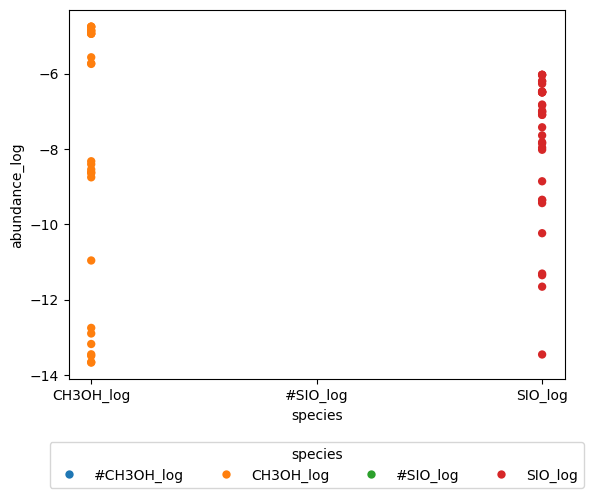

In [8]:
ax=sns.scatterplot(dfFinal, x='species', y='abundance_log',
                hue='species',
                linewidth=0,
                )
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)

# Hot core

In [ ]:
tipo=constants.HOTCORE
df= Plotting.buildDataframe(tipo, folder, physical, species)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')
dfFinal= Plotting.localAbundanceDataframe(df, [prop+'_log' for prop in species])

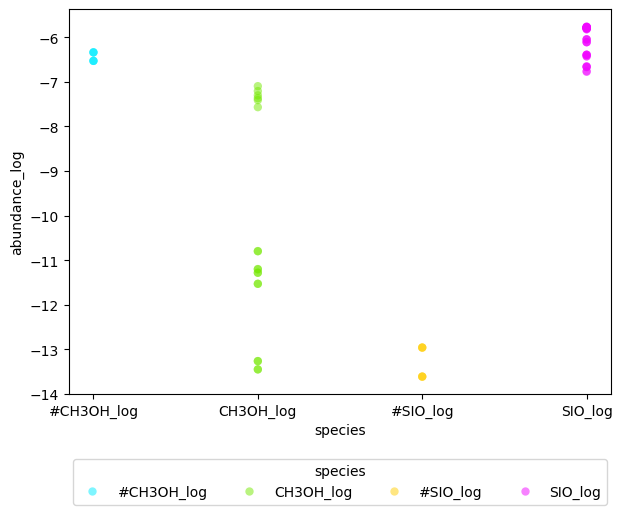

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(dfFinal, y='abundance_log', x='species',
             hue='species', palette='gist_ncar',
             linewidth=0, ax=ax, alpha=0.5,
             )
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#         verticalalignment='center', transform=ax.transAxes)